In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
digit = load_digits()

In [3]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df["target"] = digit.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
digit.data[672]

array([ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
        0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
       14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2.,
        0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10.,
        4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.])

In [6]:
digit.data[672].reshape(8,8)

array([[ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15.,  9., 12., 10.,  2.,  0.],
       [ 0.,  0., 16., 13.,  8.,  8., 11.,  0.],
       [ 0.,  0., 13., 10.,  4.,  9., 15.,  0.],
       [ 0.,  0.,  3., 10., 15.,  9.,  2.,  0.]])

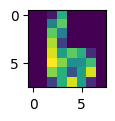

In [9]:
%matplotlib inline
plt.figure(figsize=(1,3))
plt.imshow(digit.data[672].reshape(8,8))
plt.show()

In [8]:
digit.target[672]

6

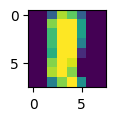

In [10]:
plt.figure(figsize=(1,3))
plt.imshow(digit.data[823].reshape(8,8))
plt.show()

In [11]:
digit.target[823]

1

In [12]:
X = df.drop("target", axis=1)
y = df["target"]

In [13]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state=25)

In [18]:
from sklearn.linear_model import LogisticRegression
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [15]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_tr, y_tr)

LogisticRegression()

In [20]:
log_reg.score(X_tr, y_tr)

1.0

In [21]:
y_pred = log_reg.predict(X_te)
y_pred

array([1, 0, 2, 4, 0, 3, 7, 2, 3, 1, 9, 4, 3, 6, 7, 9, 3, 9, 9, 7, 2, 9,
       8, 6, 7, 5, 5, 9, 2, 0, 7, 4, 6, 1, 4, 6, 3, 9, 0, 8, 5, 7, 7, 6,
       4, 2, 1, 3, 1, 4, 2, 0, 4, 2, 4, 2, 4, 1, 5, 4, 0, 9, 6, 0, 0, 8,
       6, 1, 9, 5, 1, 5, 3, 4, 3, 2, 7, 1, 9, 6, 3, 5, 9, 5, 5, 6, 5, 4,
       3, 1, 1, 3, 9, 5, 9, 8, 0, 7, 8, 5, 9, 8, 6, 5, 4, 9, 4, 8, 7, 0,
       7, 9, 7, 3, 5, 3, 8, 0, 1, 4, 9, 5, 6, 7, 1, 5, 5, 3, 8, 9, 7, 3,
       7, 8, 3, 8, 6, 6, 7, 0, 6, 2, 3, 4, 0, 2, 0, 3, 0, 1, 0, 3, 7, 6,
       7, 3, 5, 9, 4, 0, 8, 4, 1, 1, 6, 4, 4, 9, 8, 5, 3, 8, 9, 7, 9, 1,
       7, 9, 7, 6, 9, 3, 8, 9, 1, 8, 1, 1, 3, 1, 9, 0, 8, 8, 5, 2, 8, 1,
       0, 6, 7, 1, 7, 6, 0, 2, 5, 0, 7, 7, 2, 8, 1, 5, 6, 8, 0, 0, 6, 3,
       2, 9, 2, 4, 6, 2, 4, 3, 8, 3, 6, 1, 5, 0, 5, 3, 3, 9, 6, 6, 2, 6,
       1, 0, 4, 0, 1, 9, 9, 5, 6, 3, 6, 9, 1, 1, 9, 5, 5, 9, 7, 5, 3, 6,
       0, 4, 5, 4, 6, 1, 8, 7, 7, 9, 8, 0, 4, 2, 9, 4, 2, 2, 1, 6, 3, 5,
       4, 2, 8, 4, 8, 2, 4, 9, 0, 0, 3, 0, 1, 1, 4,

In [22]:
accuracy_score(y_te, y_pred)

0.9574074074074074

In [23]:
confusion_matrix(y_te, y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  2,  0,  0,  0,  0,  1,  1],
       [ 0,  1, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 54,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  1, 50,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  4],
       [ 0,  0,  0,  0,  1,  1,  0,  0, 50,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 52]], dtype=int64)

In [24]:
import seaborn as sns

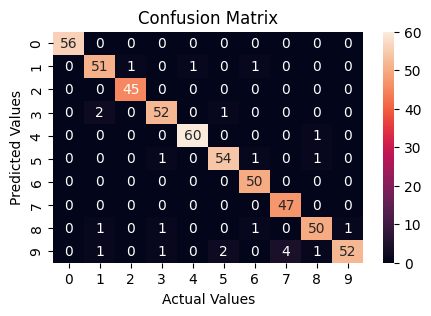

In [33]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_pred, y_te), annot=True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

In [32]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.94      0.93      0.94        55
           2       1.00      0.98      0.99        46
           3       0.95      0.95      0.95        55
           4       0.98      0.98      0.98        61
           5       0.95      0.95      0.95        57
           6       1.00      0.94      0.97        53
           7       1.00      0.92      0.96        51
           8       0.93      0.94      0.93        53
           9       0.85      0.98      0.91        53

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [39]:
from sklearn.datasets import make_classification

In [59]:
data = make_classification(n_classes=2, n_features=4, n_informative=1, n_samples=1000)

ValueError: n_classes(2) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(1)=2

In [ ]:
data[0]

In [ ]:
data[1]

In [ ]:
X_new = data[0]
y_new = data[1]

In [ ]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X_new, y_new, train_size=0.7, random_state=25)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_tr1, y_tr1)

In [60]:
y_pred_prob = lr.predict_proba(X_te1)

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

In [62]:
fpr, tpr, th = roc_curve(y_te1, y_pred_prob[:,1], pos_label=1)

In [63]:
random_prob = [0 for i in range(len(y_te1))]

In [64]:
rfpr, rtpr, rth = roc_curve(y_te1, random_prob, pos_label=1)

In [65]:
auc_score = roc_auc_score(y_te1, y_pred_prob[:,1])

In [66]:
auc_score

0.9892884128183476

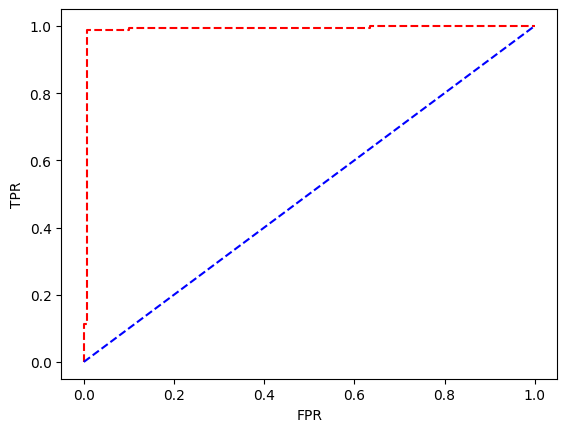

In [67]:
plt.plot(fpr, tpr, linestyle="--", color="red")
plt.plot(rfpr, rtpr, linestyle="--", color="blue")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()